## Pandas

In [2]:
import pandas as pd # type: ignore
# Cargar el dataset (supongamos que está en formato CSV)
df_pandas= pd.read_csv("android_traffic.csv" ,   sep=";")

# Muestra la información del dataset
df_pandas.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7845 entries, 0 to 7844
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  7845 non-null   object 
 1   tcp_packets           7845 non-null   int64  
 2   dist_port_tcp         7845 non-null   int64  
 3   external_ips          7845 non-null   int64  
 4   vulume_bytes          7845 non-null   int64  
 5   udp_packets           7845 non-null   int64  
 6   tcp_urg_packet        7845 non-null   int64  
 7   source_app_packets    7845 non-null   int64  
 8   remote_app_packets    7845 non-null   int64  
 9   source_app_bytes      7845 non-null   int64  
 10  remote_app_bytes      7845 non-null   int64  
 11  duracion              0 non-null      float64
 12  avg_local_pkt_rate    0 non-null      float64
 13  avg_remote_pkt_rate   0 non-null      float64
 14  source_app_packets.1  7845 non-null   int64  
 15  dns_query_times      

In [3]:
# Mostrar el tamaño del dataset
print(df_pandas.shape)
print(f"Tamaño del dataset: {df_pandas.shape[0]} filas y {df_pandas.shape[1]} columnas")

(7845, 17)
Tamaño del dataset: 7845 filas y 17 columnas


In [4]:
# Convertir a unidades más legibles
def convertir_tamanio(bytes):
    if bytes < 1024:
        return f"{bytes} bytes"
    elif bytes < 1024**2:
        return f"{bytes/1024:.2f} KB"
    elif bytes < 1024**3:
        return f"{bytes/(1024**2):.2f} MB"
    else:
        return f"{bytes/(1024**3):.2f} GB"
# Tamaño en bytes del DataFrame en memoria
tamanio_memoria = df_pandas.memory_usage(deep=True).sum()

print(f"Tamaño en memoria: {convertir_tamanio(tamanio_memoria)}")

Tamaño en memoria: 1.76 MB


In [5]:
from pathlib import Path

tamanio = Path('android_traffic.csv').stat().st_size
print(f"Tamaño del archivo: {convertir_tamanio(tamanio)}")

Tamaño del archivo: 504.78 KB


In [6]:
# Ver cantidad de valores faltantes por columna
print(df_pandas.isnull().sum())

name                       0
tcp_packets                0
dist_port_tcp              0
external_ips               0
vulume_bytes               0
udp_packets                0
tcp_urg_packet             0
source_app_packets         0
remote_app_packets         0
source_app_bytes           0
remote_app_bytes           0
duracion                7845
avg_local_pkt_rate      7845
avg_remote_pkt_rate     7845
source_app_packets.1       0
dns_query_times            0
type                       0
dtype: int64


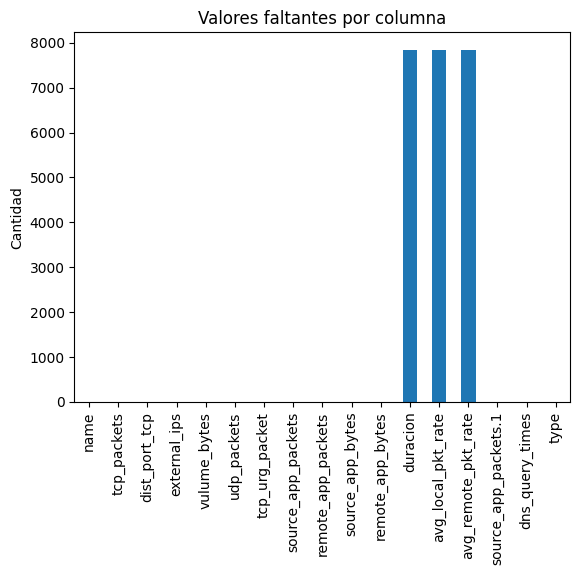

In [9]:
import matplotlib.pyplot as plt # type: ignore

df_pandas.isnull().sum().plot(kind='bar')
plt.title('Valores faltantes por columna')
plt.ylabel('Cantidad')
plt.show()

In [10]:
# Para columnas categóricas/texto
for col in df_pandas.select_dtypes(include=['object']).columns:
    print(f"\nColumna: {col}")
    print(df_pandas[col].value_counts(dropna=False))


Columna: name
name
Reading             774
Plankton            483
DroidKungFu         427
AntiVirus           396
NewsAndMagazines    360
                   ... 
Spy.ImLog             1
Stealthcell           1
Stealer               1
Updtbot               1
YcChar                1
Name: count, Length: 114, dtype: int64

Columna: type
type
benign       4704
malicious    3141
Name: count, dtype: int64


In [11]:
print(f"Número de filas duplicadas: {df_pandas.duplicated().sum()}")

Número de filas duplicadas: 1785
